<h2 style="text-align:center">LAB2</h2>

<p>
Objective:
To explore and compare different activation functions used in artificial neural networks
and understand their impact on the output of a neural network.

<p>Name: Kushal Sourav B
<p>Regno: 2347125

Activation Functions and Their Visualization

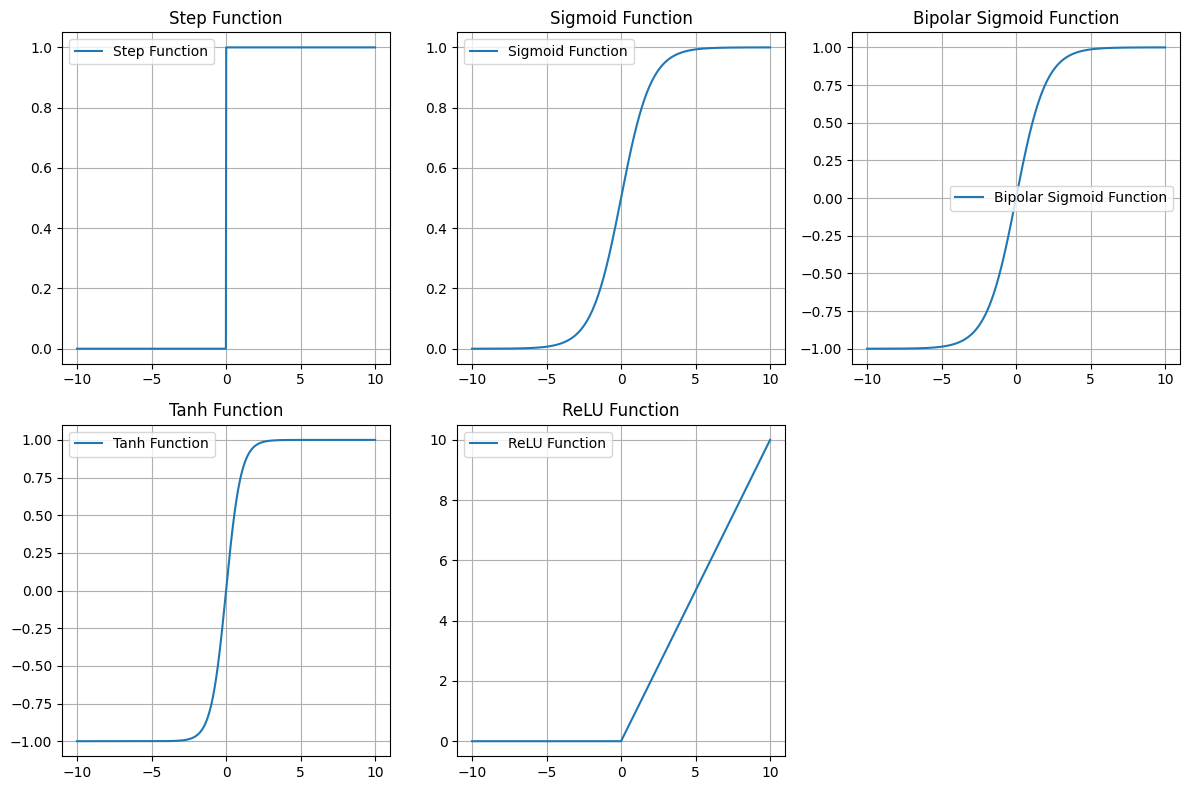

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid_function(x):
    return (2 / (1 + np.exp(-x))) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)


x = np.linspace(-10, 10, 1000)

activation_functions = {
    "Step Function": step_function,
    "Sigmoid Function": sigmoid_function,
    "Bipolar Sigmoid Function": bipolar_sigmoid_function,
    "Tanh Function": tanh_function,
    "ReLU Function": relu_function
}

plt.figure(figsize=(12, 8))

for i, (name, func) in enumerate(activation_functions.items(), start=1):
    plt.subplot(2, 3, i)
    plt.plot(x, func(x), label=name)
    plt.title(name)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


Simple Neural Network for AND Problem

AND Truth Table

<table>
  <thead>
    <tr>
      <th>Input 1</th>
      <th>Input 2</th>
      <th>Output</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>1</td>
      <td>1</td>
      <td>1</td>
    </tr>
  </tbody>
</table>



In [8]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
y = np.array([0, 0, 0, 1])  

def create_model(activation_function):
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(2,)),
        tf.keras.layers.Dense(8, activation=activation_function),
        tf.keras.layers.Dense(1, activation='sigmoid') 
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

activation_funcs = ['sigmoid', 'tanh', 'relu']
results = {}


for func in activation_funcs:
    print(f"\nTraining with {func} activation function:")
    
    model = create_model(func)
    model.fit(X, y, epochs=1000, verbose=0)
    
    predictions = np.round(model.predict(X))
    accuracy = accuracy_score(y, predictions)
    
    print(f"Accuracy with {func}: {accuracy:.4f}")
    results[func] = accuracy


print("\nComparison of Activation Functions:")
for func, acc in results.items():
    print(f"Activation Function: {func} -> Accuracy: {acc:.4f}")



Training with sigmoid activation function:


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Accuracy with sigmoid: 1.0000

Training with tanh activation function:


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Accuracy with tanh: 1.0000

Training with relu activation function:


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Accuracy with relu: 1.0000

Comparison of Activation Functions:
Activation Function: sigmoid -> Accuracy: 1.0000
Activation Function: tanh -> Accuracy: 1.0000
Activation Function: relu -> Accuracy: 1.0000


* Sigmoid: Works very well for binary classification and can easily handle the AND problem.

* Tanh: Equally effective in this case because it’s a simple binary classification task.

* ReLU: Despite being designed for deeper networks, ReLU can also solve the AND gate but may not be as efficient for binary classification tasks compared to sigmoid and tanh